# Final Project

Avi Kodali

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Image Processing

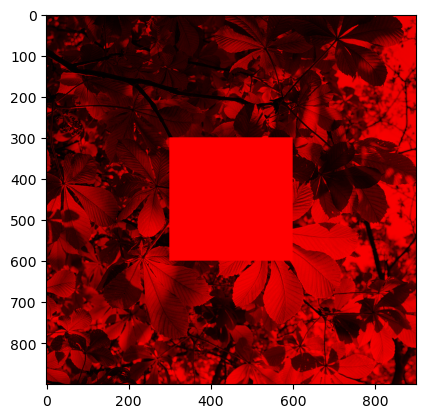

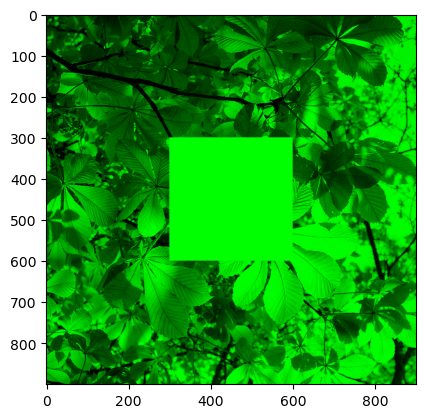

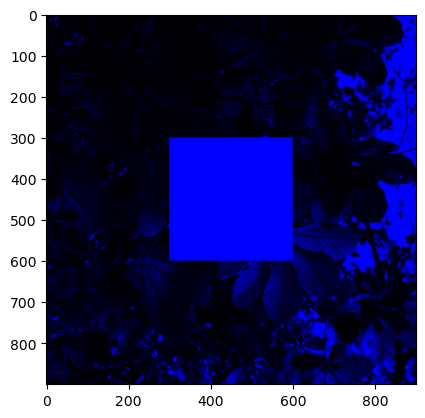

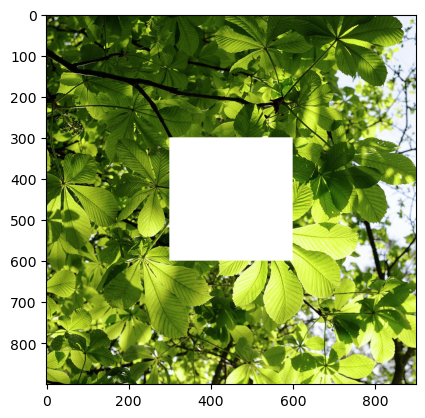

In [2]:
# Reading in the image
leaves1 = mpimg.imread('leaves1.jpg')
# Dividing the array by 255 so the values range from 0 to 1
leaves1 = leaves1 / 255

# Splitting the image into its R, G, and B components
leaves1_r = leaves1[:,:,0]
leaves1_g = leaves1[:,:,1]
leaves1_b = leaves1[:,:,2]

# Making a maksed version of the image by setting the RGB values in the middle 300 by 300 equal to 1
leaves1_masked = leaves1.copy()
leaves1_masked[300:600, 300:600, :] = 1

# Same splitting the the masked image into R, G, and B arrays
leaves1_masked_r = leaves1_masked[:,:,0]
leaves1_masked_g = leaves1_masked[:,:,1]
leaves1_masked_b = leaves1_masked[:,:,2]

# Here I plotted the red, green, blue, and full color masked image
test_r = np.zeros((900,900,3))
test_r[:,:,0] = leaves1_masked_r[:,:]
plt.figure()
plt.imshow(test_r);

test_g = np.zeros((900,900,3))
test_g[:,:,1] = leaves1_masked_g[:,:]
plt.figure()
plt.imshow(test_g);

test_b = np.zeros((900,900,3))
test_b[:,:,2] = leaves1_masked_b[:,:]
plt.figure()
plt.imshow(test_b);

plt.figure()
plt.imshow(leaves1_masked);

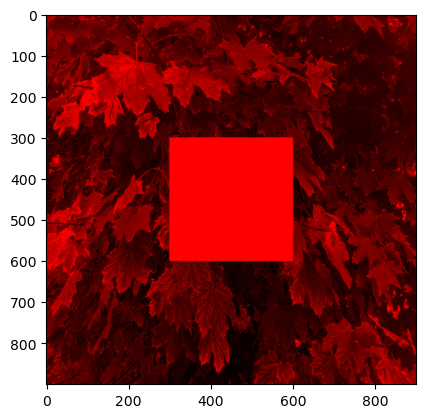

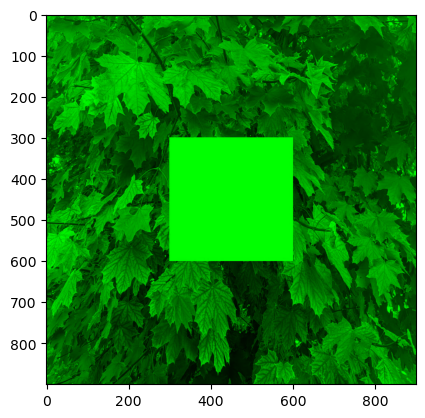

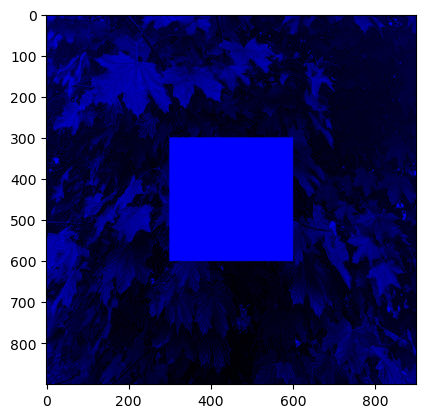

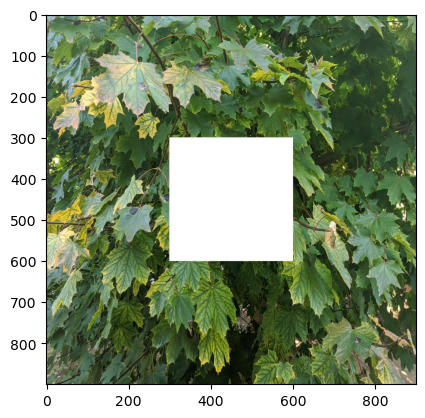

In [3]:
# Same process as above
leaves_masked = mpimg.imread('Leaves_Masked.jpg')
leaves_masked = leaves_masked / 255
leaves_masked_r = leaves_masked[:,:,0]
leaves_masked_g = leaves_masked[:,:,1]
leaves_masked_b = leaves_masked[:,:,2]

testm_r = np.zeros((900,900,3))
testm_r[:,:,0] = leaves_masked_r[:,:]
plt.figure()
plt.imshow(testm_r);

testm_g = np.zeros((900,900,3))
testm_g[:,:,1] = leaves_masked_g[:,:]
plt.figure()
plt.imshow(testm_g);

testm_b = np.zeros((900,900,3))
testm_b[:,:,2] = leaves_masked_b[:,:]
plt.figure()
plt.imshow(testm_b);

plt.figure()
plt.imshow(leaves_masked);

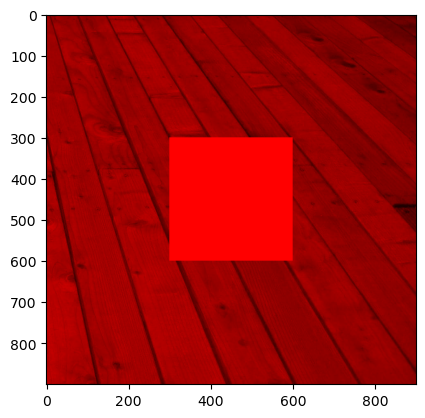

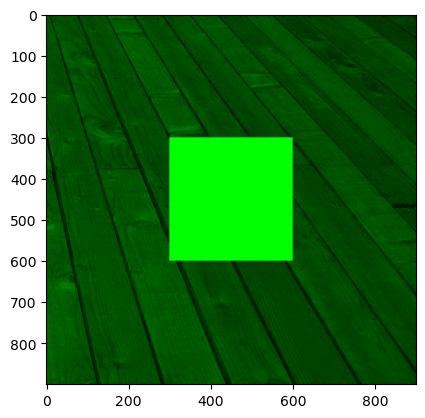

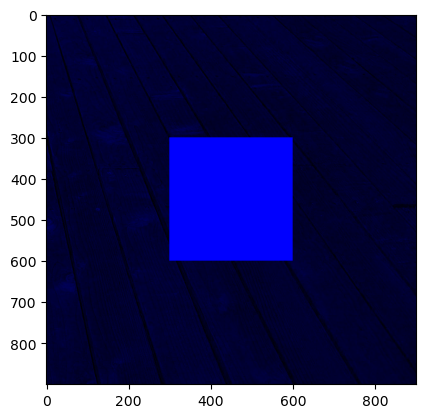

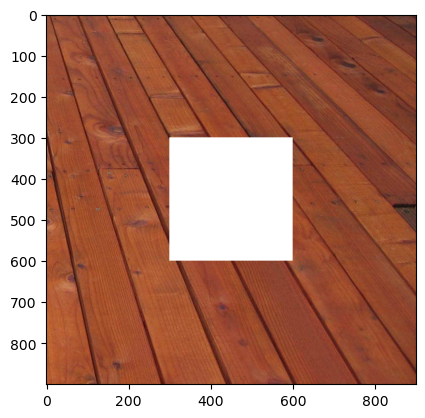

In [4]:
# Same process as above
wood1 = mpimg.imread('wood1.jpg')
wood1 = wood1 / 255
wood1 = wood1[-900:,-900:,:]

wood1_r = wood1[:,:,0]
wood1_g = wood1[:,:,1]
wood1_b = wood1[:,:,2]

wood1_masked = wood1.copy()
wood1_masked[300:600, 300:600, :] = 1

wood1_masked_r = wood1_masked[:,:,0]
wood1_masked_g = wood1_masked[:,:,1]
wood1_masked_b = wood1_masked[:,:,2]

test_r = np.zeros((900,900,3))
test_r[:,:,0] = wood1_masked_r[:,:]
plt.figure()
plt.imshow(test_r);

test_g = np.zeros((900,900,3))
test_g[:,:,1] = wood1_masked_g[:,:]
plt.figure()
plt.imshow(test_g);

test_b = np.zeros((900,900,3))
test_b[:,:,2] = wood1_masked_b[:,:]
plt.figure()
plt.imshow(test_b);

plt.figure()
plt.imshow(wood1_masked);

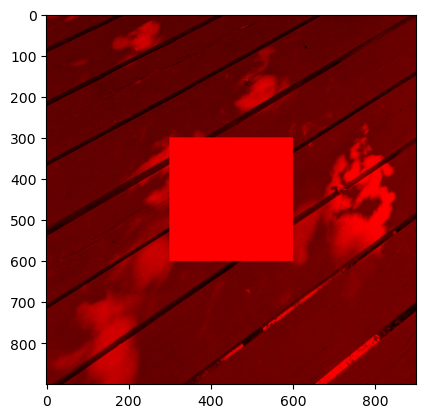

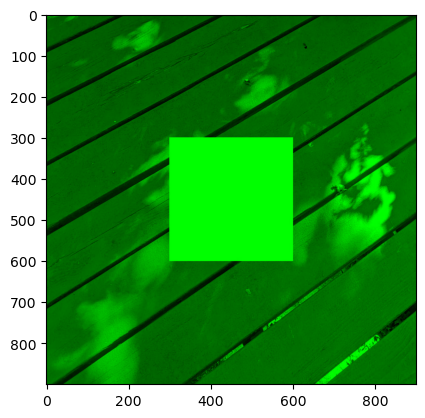

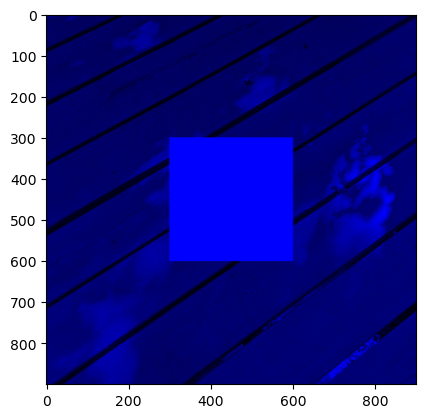

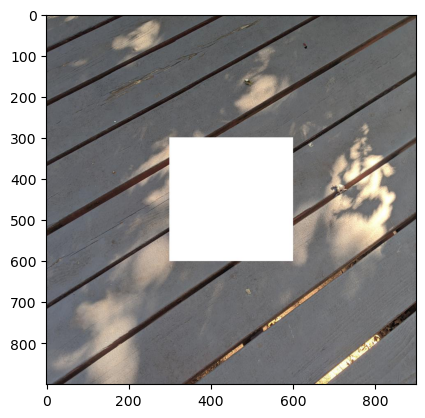

In [5]:
# Same process as above
wood_masked = mpimg.imread('Wood_Masked.jpg')
wood_masked = wood_masked / 255

wood_masked_r = wood_masked[:,:,0]
wood_masked_g = wood_masked[:,:,1]
wood_masked_b = wood_masked[:,:,2]

test_r = np.zeros((900,900,3))
test_r[:,:,0] = wood_masked_r[:,:]
plt.figure()
plt.imshow(test_r);

test_g = np.zeros((900,900,3))
test_g[:,:,1] = wood_masked_g[:,:]
plt.figure()
plt.imshow(test_g);

test_b = np.zeros((900,900,3))
test_b[:,:,2] = wood_masked_b[:,:]
plt.figure()
plt.imshow(test_b);

plt.figure()
plt.imshow(wood_masked);

## Model 1

In [6]:
#class for building a decision with termination by maximum tree depth
class DecisionTree: 
    #initiating the node
    def __init__(self, X_data, y_data, max_tree_depth=1e99, min_sample_size=1, tree_depth=0, split_variable = None, alpha = None, left = None, right = None):
        #setting a left node
        self.left = None
        #setting a right node
        self.right = None
        #assigning the variable that was split on to the node
        self.split_variable = None
        #assigning the threshold that was used to split to the node
        self.alpha = None
        #setting tree depth at the node
        self.tree_depth = tree_depth
        #keeping track of max tree depth
        self.max_tree_depth = max_tree_depth
        # Setting the minimum sample size for the node
        self.min_sample_size = min_sample_size
        # Setting the sample size at this node
        self.sample_size = X_data.shape[0]
        # The average of the remaining y data values(used to return at the terminal nodes)
        self.y_mean = np.mean(y_data)
    
    #function to decide which variable to split on
    def decide_split_variable(self, X_data, y_data):
        #setting a variable to save the highest correlation
        highest_corr = 0
        #setting a variable to save the most correlated variable(it's column index in the data)
        most_corr_x = 0
        #starting a loop to go through each column of the data
        for column in range(X_data.shape[1]):
            #calculating the variance of the X column
            x_var = np.var(X_data[:, column])
            #calculating the variance of the y data
            y_var = np.var(y_data)
            #calculating the covariance betweent the X column and y data(the numpy covariance function makes a covariance matrix where the values at [0][1] and [1][0] represent Cov(X,y))
            xy_cov = np.cov(X_data[:, column], y_data)[0][1]
            #using calculated variance and covariance to get correlation
            corr = abs(xy_cov / (np.sqrt(x_var * y_var)))
            #checking if the calculated correlation is higher than the current correlation, and if it is, setting this X to be the one to split on
            if corr > highest_corr:
                highest_corr = corr
                most_corr_x = column
        #returning the column index of the variable to split on
        return most_corr_x
    
    #function to pick the threshold to split the data
    def pick_threshold(self, X_data, y_data, split_variable):
        #making a sorted array of midpoints for the data values of the variable being splitted
        sorted_midpoints = (np.sort(X_data[:, split_variable])[1:] + np.sort(X_data[:, split_variable])[:-1]) / 2
        #setting a variable to save the lowest error for each alpha(midpoint)
        alpha_error = 1e99
        #setting a variable to save the alpha to use as the threshold
        alpha = 0
        #for loop to iterate through each of the midpoints
        for a in sorted_midpoints:
            #empty list to store y values that correspond to the data values left of the alpha
            left_alpha_y = []
            #empty list to store y values that correspond to the data values right and equal to the alpha
            right_alpha_y = []
            #for loop to iterate through each row of the data matrix(each data value of dataset)
            for row in range(X_data.shape[0]):
                #checking if the data value for the variable is less than alpha
                if X_data[row, split_variable] < a:
                    #if it is, then append the corresponding y value to the left list
                    left_alpha_y.append(y_data[row])
                else:
                    #if not, append the corresponding y value to the right list
                    right_alpha_y.append(y_data[row])
            #converting the lists to numpy arrays for easier calculations
            left_alpha_y = np.array(left_alpha_y)
            right_alpha_y = np.array(right_alpha_y)
            #finding the error for the left data
            left_error = np.mean((left_alpha_y - np.mean(left_alpha_y))**2)
            #finding the error for the right data
            right_error = np.mean((right_alpha_y - np.mean(right_alpha_y))**2)
            #finding the total error for this value of alpha
            test_alpha_error = ((left_alpha_y.size / y_data.size) * left_error) + ((right_alpha_y.size / y_data.size) * right_error)
            #checking if this error is the smallest thus far
            if test_alpha_error < alpha_error:
                #if it is, set the smallest alpha error to this error, and change alpha to this midpoint
                alpha_error = test_alpha_error
                alpha = a
        #return alpha with smallest total error
        return alpha
    
    #function to build decision tree
    def build_decision_tree(self, X_data, y_data):  
        #checking if the tree depth has reached the max tree depth
        depth = self.tree_depth
        if (depth < self.max_tree_depth) & (self.sample_size > self.min_sample_size):
            #if it hasn't, continue building tree
            
            #decide a variable to split on
            #print(y_data.shape)
            split_variable = self.decide_split_variable(X_data, y_data)
            #decide which threshold to use to split
            alpha = self.pick_threshold(X_data, y_data, split_variable)
            self.split_variable = split_variable
            self.alpha = alpha
            #making an array of 0s(with size equal to the number of variables in the data) to store the left data
            left_data = np.zeros((X_data[:,split_variable][X_data[:,split_variable] <= alpha].size , X_data.shape[1]))
            #making a list to store the corresponding y values of the left data
            left_data_y = []
            #making an array of 0s(with size equal to the number of variables in the data) to store the right data
            right_data = np.zeros((X_data[:,split_variable][X_data[:,split_variable] > alpha].size , X_data.shape[1]))
            #making a list to store the corresponding y values of the right data
            right_data_y = []
            # Setting up indices to keep track of where I am in the X data and properly append the data points to each split
            l_i = 0
            r_i = 0
            #iterating through each row of the data
            #print(right_data.shape, left_data.shape)
            for row in range(X_data.shape[0]):
                # If the feature is 1 add it to the left data
                if X_data[row, split_variable] <= alpha:
                    #print('left', l_i, row)
                    left_data[l_i,:] = X_data[row,:]
                    left_data_y.append(y_data[row])
                    l_i+=1
                # Else add it to the right data
                elif X_data[row, split_variable] > alpha:
                    #print('right', r_i, row)
                    right_data[r_i,:] = X_data[row,:]
                    right_data_y.append(y_data[row])
                    r_i+=1
            #converting the left and right y lists to numpy arrays for the next parts of building the trees
            left_data_y = np.array(left_data_y)
            #print(left_data.shape, left_data_y.shape)
            right_data_y = np.array(right_data_y)
            #increase tree depth by 1
            depth += 1
            #print(depth)
            #print(self.max_tree_depth)
            #setting up the left and right nodes
            left_tree = DecisionTree(left_data, left_data_y, self.max_tree_depth, tree_depth = depth)
            right_tree = DecisionTree(right_data, right_data_y, self.max_tree_depth, tree_depth = depth)
            #setting the left node of the root adn then recursively building from that left node 
            self.left = left_tree
            self.left.build_decision_tree(left_data, left_data_y)
            #setting the right node of the root adn then recursively building from that left node
            self.right = right_tree
            self.right.build_decision_tree(right_data, right_data_y)
            
    #Getting the fitted y values from the trained decision tree
    def get_fitted_values(self, X_data):
        #setting up a list to store the fitted values
        fitted_values = []
        #initiating the node
        #iterating through the rows of the dataset
        for row in range(X_data.shape[0]):
            node = self
            #checking to see if the terminal node has been reached
            while (node.tree_depth < node.max_tree_depth) & (node.sample_size > node.min_sample_size):
                #checking if the value in the data set for the selected feature is less than the threshold
                if X_data[row, node.split_variable] < node.alpha:
                    #if so, we go to the left node of the current node
                    node = node.left
                else: 
                    #otherwise we go to the right node of the current node
                    node = node.right
            #adding the average y-value at the terminal node to the fitted values list
            fitted_values.append(node.y_mean)
        #making the list an array for easier computation of error
        fitted_values = np.array(fitted_values)
        return fitted_values

In [8]:
# Function to make the different decision trees for red values, green values, and blue values of the input data
def make_image_trees(r_image, g_image, b_image, train_row, max_tree, min_sample):
    # Obtaining the x training data from the image by selecting the top-middle 300 by 300 pixels
    train_r = np.rot90(r_image[0:300, 300:600], k=1)
    train_g = np.rot90(g_image[0:300, 300:600], k=1)
    train_b = np.rot90(b_image[0:300, 300:600], k=1)

    # y training data is the row of the image given as an argument, and the 300 to 600 column pixels of that row
    ytrain_r = r_image[train_row, 300:600]
    ytrain_g = g_image[train_row, 300:600]
    ytrain_b = b_image[train_row, 300:600]

    # Here I train the decision tree for each R, G, and B values, and then printing the corresponding training error
    r_root = DecisionTree(train_r, ytrain_r, max_tree_depth=max_tree, min_sample_size=min_sample)
    r_root.build_decision_tree(train_r, ytrain_r)
    r_fit = r_root.get_fitted_values(train_r)
    print('Red training error:', np.mean(((ytrain_r - r_fit)*255)**2))

    g_root = DecisionTree(train_g, ytrain_g, max_tree_depth=max_tree, min_sample_size=min_sample)
    g_root.build_decision_tree(train_g, ytrain_g)
    g_fit = g_root.get_fitted_values(train_g)
    print('Green training error:', np.mean(((ytrain_g - g_fit)*255)**2))

    b_root = DecisionTree(train_b, ytrain_b, max_tree_depth=max_tree, min_sample_size=min_sample)
    b_root.build_decision_tree(train_b, ytrain_b)
    b_fit = b_root.get_fitted_values(train_b)
    print('Blue training error:', np.mean(((ytrain_b - b_fit)*255)**2))

    return r_root, g_root, b_root

In [9]:
# Function to fill in the image using the trained decision trees
def fill_image_tree(masked_image, r_tree, g_tree, b_tree):
    # Splitting the masked image into its R, G, and B components
    mi_r = masked_image[:,:,0]
    mi_g = masked_image[:,:,1]
    mi_b = masked_image[:,:,2]

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using the decision tree, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_r[t_i:r_i, 300:600], k=1)
        temp_fitted = r_tree.get_fitted_values(temp_data)
        mi_r[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the red component of the red image to the fitted red component
    masked_image[:,:,0] = mi_r

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using the decision tree, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_g[t_i:r_i, 300:600], k=1)
        temp_fitted = g_tree.get_fitted_values(temp_data)
        mi_g[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the green component of the green image to the fitted green component
    masked_image[:,:,1] = mi_g

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using the decision tree, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_b[t_i:r_i, 300:600], k=1)
        temp_fitted = b_tree.get_fitted_values(temp_data)
        mi_b[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the blue component of the blue image to the fitted blue component
    masked_image[:,:,2] = mi_b

    return masked_image

c:\Users\aviko\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\aviko\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Red training error: 555.0480739302968
Green training error: 526.8442654955446


C:\Users\aviko\AppData\Local\Temp\ipykernel_116968\3394172774.py:39: RuntimeWarning: invalid value encountered in scalar divide
  corr = abs(xy_cov / (np.sqrt(x_var * y_var)))


Blue training error: 631.1742567496891


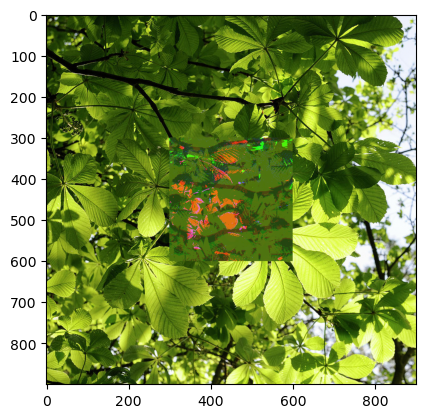

In [10]:
# Using the previous functions to fill in the masked leaves1 image.
leaves1_r_root, leaves1_g_root, leaves1_b_root = make_image_trees(leaves1_r, leaves1_g, leaves1_b, 300, 3, 5)

leaves1_masked_test = leaves1_masked.copy()
leaves1_masked_test = fill_image_tree(leaves1_masked_test, leaves1_r_root, leaves1_g_root, leaves1_b_root)

plt.imshow(leaves1_masked_test);

In [60]:
plt.imsave("leaves1_tree.jpg", leaves1_masked_test)

In [11]:
# Error of the full fitted image
print('Error:', np.mean((((leaves1_masked_test - leaves1)*255)**2)))

Error: 590.3753961702008


Red training error: 382.33121223671577
Green training error: 462.3014964712611
Blue training error: 331.16612016151487


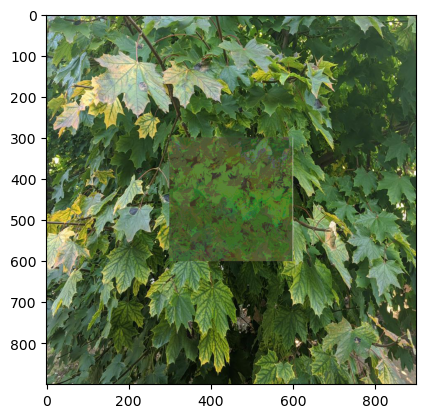

In [12]:
# Using the previous functions to fill in the masked leaves image.
leaves_r_root, leaves_g_root, leaves_b_root = make_image_trees(leaves_masked_r, leaves_masked_g, leaves_masked_b, 299, 3, 5)

leaves_masked_test = leaves_masked.copy()
leaves_masked_test = fill_image_tree(leaves_masked_test, leaves_r_root, leaves_g_root, leaves_b_root)

plt.imshow(leaves_masked_test);

In [61]:
plt.imsave("leaves_tree.jpg", leaves_masked_test)

Red training error: 190.4562369270827
Green training error: 81.71138906088751
Blue training error: 67.16429552173072


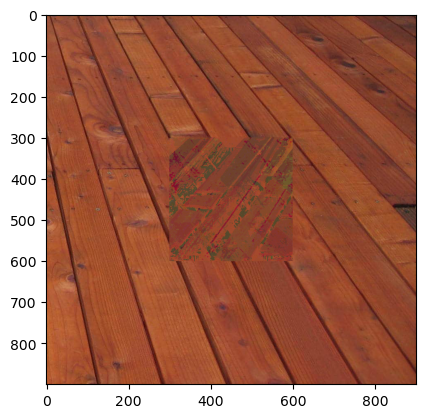

In [13]:
# Using the previous functions to fill in the masked wood1 image.
wood1_r_root, wood1_g_root, wood1_b_root = make_image_trees(wood1_r, wood1_g, wood1_b, 300, 3, 5)

wood1_masked_test = wood1_masked.copy()
wood1_masked_test = fill_image_tree(wood1_masked_test, wood1_r_root, wood1_g_root, wood1_b_root)

plt.imshow(wood1_masked_test);

In [14]:
# Error of the full fitted image
print('Error:', np.mean(((wood1_masked_test - wood1)*255)**2))

Error: 52.662881419470075


In [62]:
plt.imsave("wood1_tree.jpg", wood1_masked_test)

Red training error: 76.1323642396101
Green training error: 50.32367724867724
Blue training error: 38.328854368305585


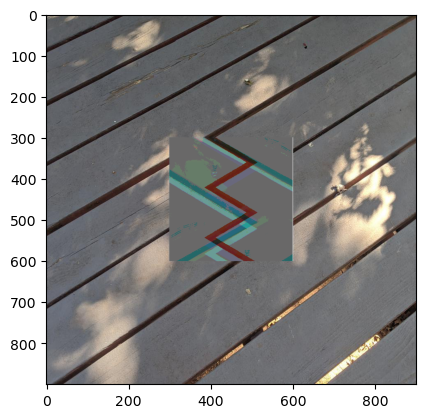

In [15]:
wood_r_root, wood_g_root, wood_b_root = make_image_trees(wood_masked_r, wood_masked_g, wood_masked_b, 299, 3, 5)

wood_masked_test = wood_masked.copy()
wood_masked_test = fill_image_tree(wood_masked_test, wood_r_root, wood_g_root, wood_b_root)

plt.imshow(wood_masked_test);

In [63]:
plt.imsave("wood_tree.jpg", wood_masked_test)

## Model 2

In [16]:
# Neural Network Program
class NN():
    # Initializing the neural network class with the data, number of hidden layers, output, weights, and loss
    def __init__(self, X, y, k, output=None, weights1=None, weights2=None, loss=None):
        self.X = X
        self.y =y
        self.k = k
        self.bias = np.ones((X.shape[0],1))
        self.input = np.append(self.X, self.bias, 1)
        self.output = output
        self.weights1 = weights1
        self.weights2 = weights2
        self.loss = loss
        
    # Function to return derivative of the tanh(x), i.e. the activation function
    def dtanh(self, x):
        return 1 - np.tanh(x)**2
        
    # Function to get the mean squared loss
    def get_loss(self):
        output = self.output
        # If there are values less than 0, set them equal to 0
        output[output < 0] = 0
        # If there are values greater than 1, set them equal to 1
        output[output > 1] = 1
        return np.mean(((output - self.y)*255)**2)

    # Function for the forward pass, where the data is passed through the entire neural network
    def forward_pass(self):
        # Getting the output after going combining input and weights
        h = np.tanh(np.matmul(self.input, self.weights1))
        # Adding a bias term to this hidden layer
        h_input = np.append(h, self.bias, 1)
        # Getting the output from the hidden layer and its corresponding weights
        z = np.matmul(h_input, self.weights2)
        # Returning the hidden layer and output for use in backpropagation
        return h_input, z

    # Function to perform back propagation
    def back_prop(self, alpha, h_input):
        # This is the derivative in terms of matrix algebra in respect to the weights going from the input to the hidden layer
        dL_dweights1 = np.matmul(self.input.transpose(), self.dtanh(np.matmul(self.input, self.weights1))) / self.X.shape[0]
        # This is the derivative in terms of matrix algebra in respect to the weights going from the hidden layer to the output
        dL_dweights2 = np.matmul(h_input.transpose(), (2 * (self.output - self.y))) / self.X.shape[0]
        # Updating these weights using the previously found derivatives
        weights1 = self.weights1 - alpha * dL_dweights1
        weights2 = self.weights2 - alpha * dL_dweights2
        # Returning the weights
        return weights1, weights2

    # Function to train the network
    def train(self, alpha, epochs):
        # Initializing the weights using Xavier initialization
        generator = np.random.default_rng(8)
        self.weights1 = generator.normal(0, np.sqrt(1 / ((301 + self.k) / 2)), size=((301, self.k)))
        self.weights2 = generator.normal(0, np.sqrt(1 / ((self.k + 1 + 1) / 2)), size=((self.k + 1)))
        # Training for the given number of epochs
        for i in range(epochs):
            # Perform forward pass
            h_input, self.output = self.forward_pass()
            # Find the loss after the forward pass
            self.loss = self.get_loss()
            # Print statement I used when testing the code
            #print(f'At epoch {i + 1} Loss: {self.loss}')
            # Updating the weights using back propagation
            self.weights1, self.weights2 = self.back_prop(alpha, h_input)
        # After finishing training, get the final output using the final weights
        h_input, self.output = self.forward_pass()
        # Get the final loss
        self.loss = self.get_loss()
        # Print statement I used when testing the code
        #print(f'Final Loss: {self.loss}')
    
    # Function to get fitted values from new input
    def fit(self, X):
        # Add bias to the given input
        input = np.append(X, np.ones((X.shape[0],1)), 1)
        # Hidden layer of the neural network
        h = np.tanh(np.matmul(input, self.weights1))
        # Adding a bias to the hidden layer
        h_input = np.append(h, np.ones((X.shape[0],1)), 1)
        # Output of the neural network
        z = np.matmul(h_input, self.weights2)
        # If there are values less than 0, set them equal to 0
        z[z < 0] = 0
        # If there are values greater than 1, set them equal to 1
        z[ z > 1] = 1
        return z


In [17]:
# Function to make the red, green, and blue neural networks
def make_image_nn(r_image, g_image, b_image, train_row, k, alpha, epochs):
    # Obtaining the training data for each neural network by chosing the top-center 300 by 300 pixels of the image
    train_r = np.rot90(r_image[0:300, 300:600], k=1)
    train_g = np.rot90(g_image[0:300, 300:600], k=1)
    train_b = np.rot90(b_image[0:300, 300:600], k=1)
    
    # y training data from the giving row argument and the center 300 pixels of that row
    ytrain_r = r_image[train_row, 300:600]
    ytrain_g = g_image[train_row, 300:600]
    ytrain_b = b_image[train_row, 300:600]

    # Starting a neural network for R, G, and B arrays, and training them
    r_nn = NN(train_r, ytrain_r, k)
    r_nn.train(alpha, epochs)
    print("Red training error:", r_nn.loss)

    g_nn = NN(train_g, ytrain_g, k)
    g_nn.train(alpha, epochs)
    print("Green training error:", g_nn.loss)

    b_nn = NN(train_b, ytrain_b, k)
    b_nn.train(alpha, epochs)
    print("Blue training error:", b_nn.loss)
    
    return r_nn, g_nn, b_nn

In [18]:
# Function to fill in the masked image using the 
def fill_image_nn(masked_image, r_nn, g_nn, b_nn):
    # Splitting the masked image into its R, G, and B components
    mi_r = masked_image[:,:,0]
    mi_g = masked_image[:,:,1]
    mi_b = masked_image[:,:,2]

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using the neural network, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_r[t_i:r_i, 300:600], k=1)
        temp_fitted = r_nn.fit(temp_data)
        mi_r[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the R component of the masked image to the fitted array from the neural network
    masked_image[:,:,0] = mi_r

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using the neural network, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_g[t_i:r_i, 300:600], k=1)
        temp_fitted = g_nn.fit(temp_data)
        mi_g[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the G component of the masked image to the fitted array from the neural network
    masked_image[:,:,1] = mi_g

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using the neural network, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_b[t_i:r_i, 300:600], k=1)
        temp_fitted = b_nn.fit(temp_data)
        mi_b[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the B component of the masked image to the fitted array from the neural network
    masked_image[:,:,2] = mi_b

    return masked_image

Red training error: 3176.120890466405
Green training error: 2250.976187310077
Blue training error: 2482.358487790659


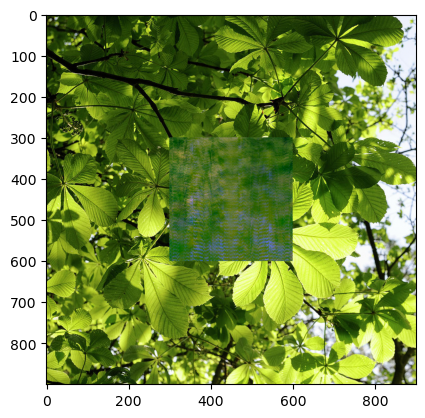

In [19]:
# Getting the neural networks based on the R, G, and B components of the masked leaves1 image, and then filling in the masked image using the functions above
leaves1_r_nn, leaves1_g_nn, leaves1_b_nn = make_image_nn(leaves1_r, leaves1_g, leaves1_b, 300, 400, 0.0001, 750)

leaves1_masked_test = leaves1_masked.copy()
leaves1_masked_test = fill_image_nn(leaves1_masked_test, leaves1_r_nn, leaves1_g_nn, leaves1_b_nn)

plt.imshow(leaves1_masked_test);

In [123]:
plt.imsave('leaves1_nn.jpg', leaves1_masked_test)

In [20]:
# Error of the fitted complete image
print('Error:', np.mean((((leaves1_masked_test - leaves1)*255)**2)))

Error: 481.51484532076324


Red training error: 773.6813472119651
Green training error: 975.9815551739302
Blue training error: 720.5518039271527


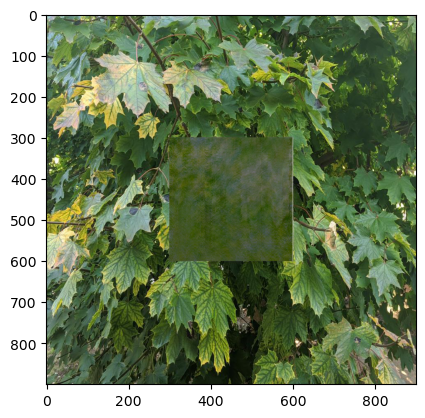

In [21]:
# Getting the neural networks based on the R, G, and B components of the masked leaves image, and then filling in the masked image using the functions above
leaves_r_nn, leaves_g_nn, leaves_b_nn = make_image_nn(leaves_masked_r, leaves_masked_g, leaves_masked_b, 299, 400, 0.0001, 750)

leaves_masked_test = leaves_masked.copy()
leaves_masked_test = fill_image_nn(leaves_masked_test, leaves_r_nn, leaves_g_nn, leaves_b_nn)

plt.imshow(leaves_masked_test);

In [124]:
plt.imsave('leaves_nn.jpg', leaves_masked_test)

Red training error: 626.2437293915002
Green training error: 222.66764073324995
Blue training error: 141.2939935945304


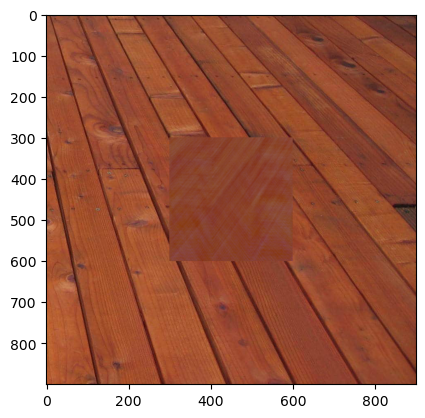

In [22]:
# Getting the neural networks based on the R, G, and B components of the masked wood1 image, and then filling in the masked image using the functions above
wood1_r_nn, wood1_g_nn, wood1_b_nn = make_image_nn(wood1_r, wood1_g, wood1_b, 300, 400, 0.0001, 750)

wood1_masked_test = wood1_masked.copy()
wood1_masked_test = fill_image_nn(wood1_masked_test, wood1_r_nn, wood1_g_nn, wood1_b_nn)

plt.imshow(wood1_masked_test);

In [23]:
# Error of the complete filled image
print('Error:', np.mean(((wood1_masked_test - wood1)*255)**2))

Error: 28.445680868097728


In [125]:
plt.imsave('wood1_nn.jpg', wood1_masked_test)

Red training error: 588.5231631687595
Green training error: 594.5569069467483
Blue training error: 558.8091832812751


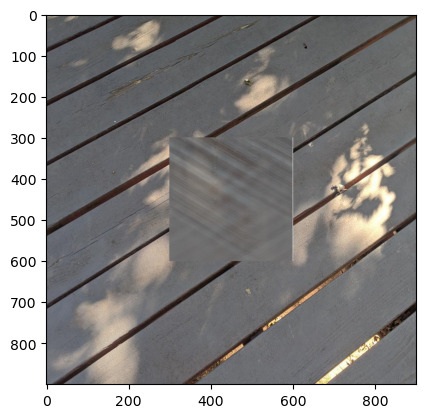

In [24]:
# Getting the neural networks based on the R, G, and B components of the masked wood image, and then filling in the masked image using the functions above
wood_r_nn, wood_g_nn, wood_b_nn = make_image_nn(wood_masked_r, wood_masked_g, wood_masked_b, 299, 400, 0.0001, 500)

wood_masked_test = wood_masked.copy()
wood_masked_test = fill_image_nn(wood_masked_test, wood_r_nn, wood_g_nn, wood_b_nn)

plt.imshow(wood_masked_test);

In [126]:
plt.imsave('wood_nn.jpg', wood_masked_test)

## Comparison with XGBoost

In [25]:
import xgboost as xgb

In [26]:
# Function to make the red, green, and blue XGBoost models
def make_image_xg(r_image, g_image, b_image, train_row, n_estimators, max_depth, eta):
    # Obtaining the training data for each neural network by chosing the top-center 300 by 300 pixels of the image
    train_r = np.rot90(r_image[0:300, 300:600], k=1)
    train_g = np.rot90(g_image[0:300, 300:600], k=1)
    train_b = np.rot90(b_image[0:300, 300:600], k=1)
    
    # y training data from the giving row argument and the center 300 pixels of that row
    ytrain_r = r_image[train_row, 300:600]
    ytrain_g = g_image[train_row, 300:600]
    ytrain_b = b_image[train_row, 300:600]

    # Starting a XGBoost model for R, G, and B arrays, and training them
    r_model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, eta=eta)
    r_model.fit(train_r, ytrain_r)

    g_model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, eta=eta)
    g_model.fit(train_g, ytrain_g)

    b_model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, eta=eta)
    b_model.fit(train_b, ytrain_b)
    
    return r_model, g_model, b_model

In [27]:
# Function to fill in the masked image using the 
def fill_image_xg(masked_image, r_xg, g_xg, b_xg):
    # Splitting the masked image into its R, G, and B components
    mi_r = masked_image[:,:,0]
    mi_g = masked_image[:,:,1]
    mi_b = masked_image[:,:,2]

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using XGBoost, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_r[t_i:r_i, 300:600], k=1)
        temp_fitted = r_xg.predict(temp_data)
        mi_r[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the R component of the masked image to the fitted array from the neural network
    masked_image[:,:,0] = mi_r

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using XGBoost, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_g[t_i:r_i, 300:600], k=1)
        temp_fitted = g_xg.predict(temp_data)
        mi_g[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the G component of the masked image to the fitted array from the neural network
    masked_image[:,:,1] = mi_g

    # Starting at the top of the image, I get the 300 by 300 training data, and predict the row underneath using XGBoost, and keep iterating down until I reach the end of the missing patch
    t_i = 0 
    for r_i in range(300,601):
        temp_data = np.rot90(mi_b[t_i:r_i, 300:600], k=1)
        temp_fitted = b_xg.predict(temp_data)
        mi_b[r_i, 300:600] = temp_fitted
        t_i+=1

    # Setting the B component of the masked image to the fitted array from the neural network
    masked_image[:,:,2] = mi_b
    masked_image[masked_image < 0] = 0
    masked_image[masked_image > 1] = 1

    return masked_image

In [28]:
# Getting the XGBoost models based on the R, G, and B components of the masked leaves image, and then filling in the masked image using the functions above
leaves1_r_xg, leaves1_g_xg, leaves1_b_xg = make_image_xg(leaves1_r, leaves1_g, leaves1_b, 300, 10000, 5, None)

leaves1_masked_test = leaves1_masked.copy()
leaves1_masked_test = fill_image_xg(leaves1_masked_test, leaves1_r_xg, leaves1_g_xg, leaves1_b_xg)

In [29]:
print('Error:', np.mean((((leaves1_masked_test - leaves1)*255)**2)))

Error: 500.70798358424406


In [30]:
leaves1_masked_test[leaves1_masked_test < 0] = 0
leaves1_masked_test[leaves1_masked_test > 1] = 1

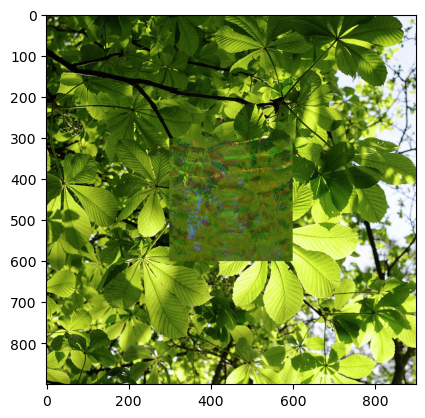

In [31]:
plt.imshow(leaves1_masked_test);

In [171]:
plt.imsave("leaves1_xg.jpg", leaves1_masked_test)

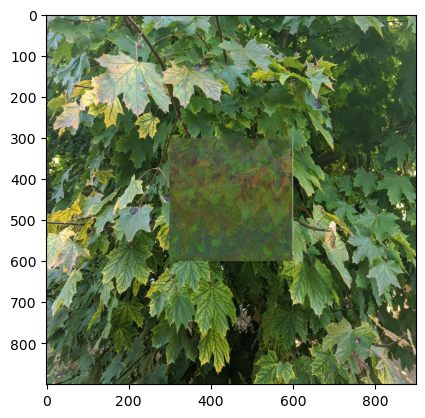

In [148]:
# Getting the XGBoost models based on the R, G, and B components of the masked leaves image, and then filling in the masked image using the functions above
leaves_r_xg, leaves_g_xg, leaves_b_xg = make_image_xg(leaves_masked_r, leaves_masked_g, leaves_masked_b, 299, 100000, 10, None)

leaves_masked_test = leaves_masked.copy()
leaves_masked_test = fill_image_xg(leaves_masked_test, leaves_r_xg, leaves_g_xg, leaves_b_xg)

plt.imshow(leaves_masked_test);

In [150]:
plt.imsave("leaves_xg.jpg", leaves_masked_test)

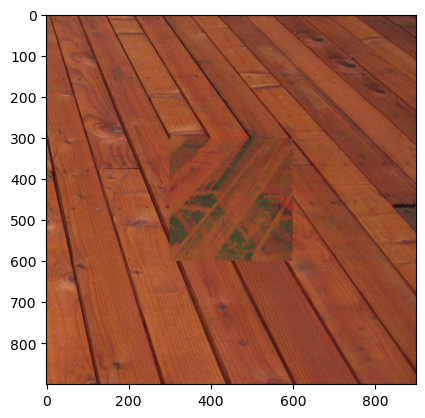

In [173]:
# Getting the XGBoost models based on the R, G, and B components of the masked wood image, and then filling in the masked image using the functions above
wood1_r_xg, wood1_g_xg, wood1_b_xg = make_image_xg(wood1_r, wood1_g, wood1_b, 300, 10000, 5, None)

wood1_masked_test = wood1_masked.copy()
wood1_masked_test = fill_image_xg(wood1_masked_test, wood1_r_xg, wood1_g_xg, wood1_b_xg)

plt.imshow(wood1_masked_test);

In [174]:
print('Error:', np.mean(((wood1_masked_test - wood1)*255)**2))

Error: 61.08895468141239


In [175]:
plt.imsave("wood1_xg.jpg", wood1_masked_test)

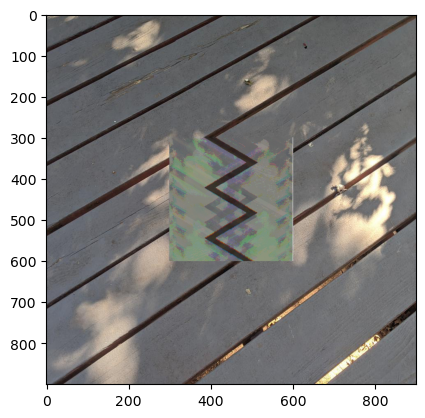

In [149]:
# Getting the XGBoost models based on the R, G, and B components of the masked wood image, and then filling in the masked image using the functions above
wood_r_xg, wood_g_xg, wood_b_xg = make_image_xg(wood_masked_r, wood_masked_g, wood_masked_b, 299, 100000, 10, None)

wood_masked_test = wood_masked.copy()
wood_masked_test = fill_image_xg(wood_masked_test, wood_r_xg, wood_g_xg, wood_b_xg)

plt.imshow(wood_masked_test);

In [151]:
plt.imsave("wood_xg.jpg", wood_masked_test)